# 0.0 IMPORTS

In [1]:
import math
import datetime
import numpy as np
import pandas as pd
import inflection
import seaborn as sns
import  matplotlib 
import  matplotlib.pyplot as plt

from scipy                          import stats as ss
from tabulate                       import tabulate
from IPython.display                import Image
from IPython.core.display           import HTML
from matplotlib.gridspec            import GridSpec
from mpl_toolkits.mplot3d           import Axes3D
from sklearn.preprocessing          import StandardScaler

## 0.1 Helper Functions

In [ ]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

In [ ]:
jupyter_settings()

In [2]:
# Notação Científica
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

## LOADING DATA

In [3]:
path = 'dataset/kc_house_data.csv'
data = pd.read_csv(path)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


# 1.0 DATA CLEANING

In [4]:
df1 = data.copy()

In [5]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## 1.1 Data Dimensions

In [6]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 21613
Number of Cols: 21


## 1.2 Data Types

In [7]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
df1['date'] = pd.to_datetime(df1['date'])

In [9]:
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.3 Check NA

In [10]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.4 Descriptive Statistical

In [11]:
num_attributes = df1.select_dtypes(include=['int64','float64' ])
num_attributes

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.00,3,2.50,1530,1131,3.00,0,0,3,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,400000.00,4,2.50,2310,5813,2.00,0,0,3,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,402101.00,2,0.75,1020,1350,2.00,0,0,3,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,400000.00,3,2.50,1600,2388,2.00,0,0,3,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


In [12]:
num_attributes.sample(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20038,3880900236,455000.00,2,1.50,910,966,2.00,0,0,3,8,820,90,2006,0,98119,47.63,-122.36,2740,6400
18914,9253900408,1400000.00,3,2.75,3130,19530,1.00,1,4,3,8,1690,1440,1947,1984,98008,47.59,-122.11,2980,18782


## 1.7.1 Numerical Attributes

In [13]:
# Tendência centra: como os dados estão :

# Média
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T

# Mediana
ct2= pd.DataFrame(num_attributes.apply(np.median)).T

In [14]:
# Dispersão: std, min, max, range, skew(assimetria), kurtosis(calda longa)

d1 = pd.DataFrame(num_attributes.apply(np.std)).T

d2 = pd.DataFrame(num_attributes.apply(np.min)).T

d3 = pd.DataFrame(num_attributes.apply(np.max)).T

d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T

d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T

d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

In [15]:
# concat

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1000102.00,9900000190.00,9899000088.00,4580301520.86,3904930410.00,2876499023.43,0.24,-1.26
1,price,75000.00,7700000.00,7625000.00,540088.14,450000.00,367118.70,4.02,34.59
2,bedrooms,0.00,33.00,33.00,3.37,3.00,0.93,1.97,49.06
3,bathrooms,0.00,8.00,8.00,2.11,2.25,0.77,0.51,1.28
4,sqft_living,290.00,13540.00,13250.00,2079.90,1910.00,918.42,1.47,5.24
5,sqft_lot,520.00,1651359.00,1650839.00,15106.97,7618.00,41419.55,13.06,285.08
6,floors,1.00,3.50,2.50,1.49,1.50,0.54,0.62,-0.48
7,waterfront,0.00,1.00,1.00,0.01,0.00,0.09,11.39,127.63
8,view,0.00,4.00,4.00,0.23,0.00,0.77,3.40,10.89
9,condition,1.00,5.00,4.00,3.41,3.00,0.65,1.03,0.53


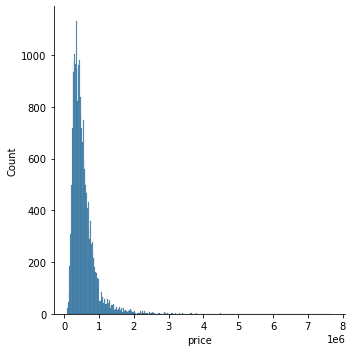

In [16]:
sns.displot(df1['price']);

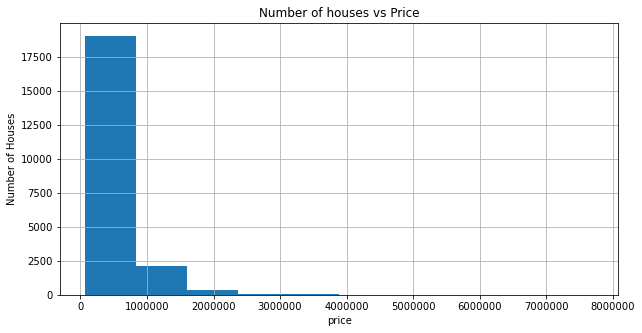

In [17]:
df1.hist('price',figsize=(10,5))
plt.title('Number of houses vs Price')
plt.ylabel('Number of Houses')
plt.xlabel("price")
plt.ticklabel_format(style='plain')

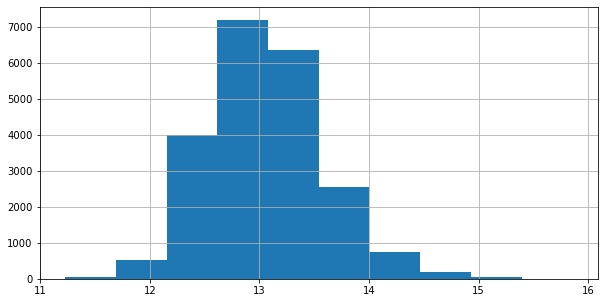

In [18]:
#log transfrom
np.log(df1.price).hist(figsize=(10,5))

plt.show()

# 2.0 Feature Engineering

In [19]:
df2 = df1.copy()

## 2.1 Hypoteses Mind map

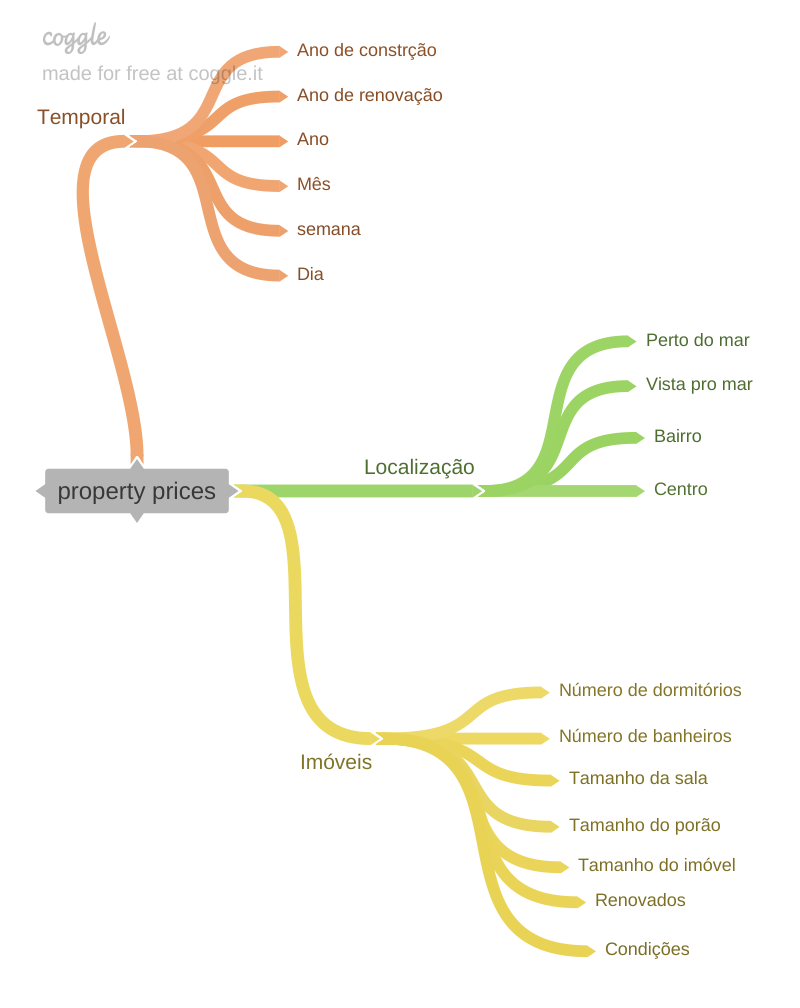

In [20]:
Image('C:/Users/Utilizador/repos/Python_zero_ao_ds/Projeto_kc_house/mindmap.png')

## 2.2 Criação de Hipoteses

### 2.2.1 Hipoteses: IMÓVEIS

1. Imóveis com maior número de dormitórios deveriam custar mais;
2. Imóveis com maior número de banheiros deveriam custar mais;
3. Imóveis com maior números de sqft(pés quadrados) na sala de estar deveriam custar mais;
4. Imóveis com maior número de sqft(pés quadrados) de porão deveriam custar mais;
5. Imóveis com maior número de stft(pés quadrados) deveriam custar mais;
6. Imóveis com maior número de pisos deveriam custar mais;
7. Imóveis a beira mar deveriam custar mais
8. Imóveis com vista deveriam custar mais;
9. Imóveis renovados deveriam custar mais;
10. Imóveis com melhores condições deveriam custar mais;

### 2.2.2 Hipoteses: LOCALIZAÇÃO

1. Imóveis perto do mar deveriam custar mais;
2. Imovéis com vista para mar devriam custar mais;

### 2.2.3 Hipoteses: TEMPO

1. Imóveis com ano de construção mais recente deveriam custar mais;
2. Imovéis com ano de renovação mais recente deveriam custar mais;

## 2.3 Feature Engineering: derivando as variaveis

In [21]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

In [22]:
# Fazer a diferença entre duas colunas: year - yr_renovated e atribuir a uma nova coluna: years_since_reform
df2['years_since_reform'] = ( ( df2['year'] - df2['yr_renovated'] ))

In [23]:
# years_since_reform: troca os anos 2014 e 2015 por zero
df2['years_since_reform'] = df2['years_since_reform'].apply( lambda x: 0 if x == 2014 else 0 if x == 2015 else x)

In [24]:
# reform: troca dos números pelos seus respectivos significados
df2['reform'] = df2['years_since_reform'].apply( lambda x: 'Sim' if x != 0 else 'Não')

In [25]:
# Fazer a diferença entre duas colunas: year - yr_built e atribuir a uma nova coluna: years_since_construction
df2['years_since_construction'] = ( ( df2['year'] - df2['yr_built'] ))

In [26]:
# waterfront: troca dos números pelos seus respectivos significados
df2['waterfront'] = df2['waterfront'].apply( lambda x: 'Sim' if x == 1 else 'Não')

In [27]:
# view: troca dos números pelos seus respectivos significados
df2['view'] = df2['view'].apply( lambda x: 'Sim' if x == 1 else 'Não')

In [28]:
df2['month'] = df2['month'].astype('str')

In [29]:
# criação da coluna sanzonality
df2['semester'] = df2['month'].apply(lambda x: 'first' if '1' <= x <= '6' else
                                                 'second')

In [30]:
 df2['mean_price_zipcode'] = ''

In [31]:
dataframe = df2[['price', 'zipcode']].groupby('zipcode').median().reset_index()
    
dataframe.columns = ['zipcode', 'median_price']
    
for i in range(len(dataframe)):
    for j in range(len(df2)):
        if (df2.loc[j, 'zipcode'] == dataframe.loc[i, 'zipcode']):
            df2.loc[j, 'mean_price_zipcode'] = dataframe.loc[i,'median_price'] 

In [32]:
df2['option_buy'] = 'no_buy'

In [33]:
df2['option_buy'] = df2[['price', 'condition', 'mean_price_zipcode']].apply(lambda x: 'buy' if (x['price'] < x['mean_price_zipcode']) & (x['condition'] > 3) else 'no_buy', axis=1)

In [34]:
df2.T

,0,1,2,3,4,5,6,7,8,9,...,21603,21604,21605,21606,21607,21608,21609,21610,21611,21612
id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310,1321400060,2008000270,2414600126,3793500160,...,7852140040,9834201367,3448900210,7936000429,2997800021,263000018,6600060120,1523300141,291310100,1523300157
date,2014-10-13 00:00:00,2014-12-09 00:00:00,2015-02-25 00:00:00,2014-12-09 00:00:00,2015-02-18 00:00:00,2014-05-12 00:00:00,2014-06-27 00:00:00,2015-01-15 00:00:00,2015-04-15 00:00:00,2015-03-12 00:00:00,...,2014-08-25 00:00:00,2015-01-26 00:00:00,2014-10-14 00:00:00,2015-03-26 00:00:00,2015-02-19 00:00:00,2014-05-21 00:00:00,2015-02-23 00:00:00,2014-06-23 00:00:00,2015-01-16 00:00:00,2014-10-15 00:00:00
price,221900.00,538000.00,180000.00,604000.00,510000.00,1225000.00,257500.00,291850.00,229500.00,323000.00,...,507250.00,429000.00,610685.00,1007500.00,475000.00,360000.00,400000.00,402101.00,400000.00,325000.00
bedrooms,3,3,2,4,3,4,3,3,3,3,...,3,3,4,4,3,3,4,2,3,2
bathrooms,1.00,2.25,1.00,3.00,2.00,4.50,2.25,1.50,1.00,2.50,...,2.50,2.00,2.50,3.50,2.50,2.50,2.50,0.75,2.50,0.75
sqft_living,1180,2570,770,1960,1680,5420,1715,1060,1780,1890,...,2270,1490,2520,3510,1310,1530,2310,1020,1600,1020
sqft_lot,5650,7242,10000,5000,8080,101930,6819,9711,7470,6560,...,5536,1126,6023,7200,1294,1131,5813,1350,2388,1076
floors,1.00,2.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,2.00,...,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00
waterfront,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
view,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não


# 3.0 VARIABLE FILTERING

In [35]:
df3 = df2.copy()

In [36]:
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,year,month,day,years_since_reform,reform,years_since_construction,semester,mean_price_zipcode,option_buy
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,Não,Não,...,5650,2014,10,13,0,Não,59,first,278277.00,no_buy
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,Não,Não,...,7639,2014,12,9,23,Sim,63,first,425000.00,no_buy
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,Não,Não,...,8062,2015,2,25,0,Não,82,first,445000.00,no_buy
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,Não,Não,...,5000,2014,12,9,0,Não,49,first,489950.00,no_buy
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,Não,Não,...,7503,2015,2,18,0,Não,28,first,642000.00,no_buy


## 3.1 Line filtering

In [37]:
df3 = df3[(df3['price'] != 0) & (df3['price'] > 0)]

## 3.2 Selection of columns

In [38]:
df3.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'day',
       'years_since_reform', 'reform', 'years_since_construction', 'semester',
       'mean_price_zipcode', 'option_buy'],
      dtype='object')

In [39]:
cols_drop= ['grade', 'sqft_above', 'sqft_living15','sqft_lot15']
df3 = df3.drop(cols_drop, axis=1)

# 4.0 EXPLORATORY DATA ANALYSIS

In [40]:
df4 = df3.copy()

## 4.1 Análise Univariada

### 4.1.1 Análise Variavél Resposta

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


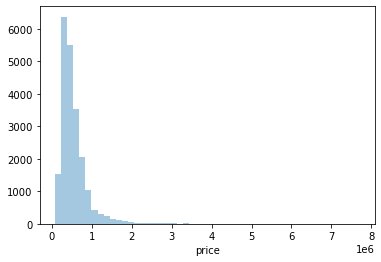

In [41]:
sns.distplot(df4['price'], kde=False);

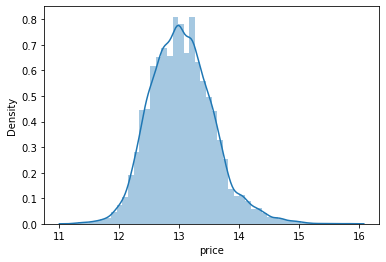

In [42]:
sns.distplot(np.log1p(df4['price']));

### 4.1.2 Análise Variavél Numérica

In [43]:
df4['mean_price_zipcode'] = df4['mean_price_zipcode'].astype(float)

In [44]:
num_attributes = df4.select_dtypes(include=['int64','float64' ])
num_attributes

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,year,day,years_since_reform,years_since_construction,mean_price_zipcode
0,7129300520,221900.00,3,1.00,1180,5650,1.00,3,0,1955,0,98178,47.51,-122.26,2014,13,0,59,278277.00
1,6414100192,538000.00,3,2.25,2570,7242,2.00,3,400,1951,1991,98125,47.72,-122.32,2014,9,23,63,425000.00
2,5631500400,180000.00,2,1.00,770,10000,1.00,3,0,1933,0,98028,47.74,-122.23,2015,25,0,82,445000.00
3,2487200875,604000.00,4,3.00,1960,5000,1.00,5,910,1965,0,98136,47.52,-122.39,2014,9,0,49,489950.00
4,1954400510,510000.00,3,2.00,1680,8080,1.00,3,0,1987,0,98074,47.62,-122.05,2015,18,0,28,642000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.00,3,2.50,1530,1131,3.00,3,0,2009,0,98103,47.70,-122.35,2014,21,0,5,550000.00
21609,6600060120,400000.00,4,2.50,2310,5813,2.00,3,0,2014,0,98146,47.51,-122.36,2015,23,0,1,305000.00
21610,1523300141,402101.00,2,0.75,1020,1350,2.00,3,0,2009,0,98144,47.59,-122.30,2014,23,0,5,450000.00
21611,291310100,400000.00,3,2.50,1600,2388,2.00,3,0,2004,0,98027,47.53,-122.07,2015,16,0,11,570500.00


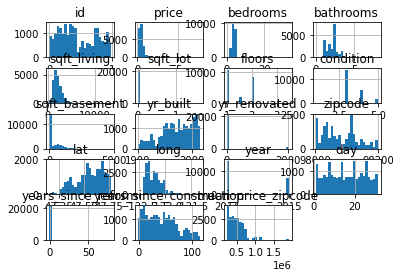

In [45]:
num_attributes.hist(bins=25);

### 4.1.3 Análise Variavél Categórica

In [46]:
cat_attributes = df4.select_dtypes(exclude=['int64','float64', 'datetime64[ns]'])
cat_attributes.sample(2)

,waterfront,view,month,reform,semester,option_buy
1160,Não,Não,8,Não,second,buy
6272,Não,Não,5,Não,first,buy


In [47]:
# Tipo unicos das variaveis categoricas por coluna
cat_attributes.apply(lambda x: x.unique().shape[0])

waterfront     2
view           2
month         12
reform         2
semester       2
option_buy     2
dtype: int64

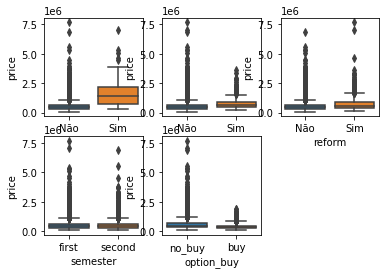

In [48]:
plt.subplot(2,3,1)
sns.boxplot(x='waterfront', y='price', data=df4)

plt.subplot(2,3,2)
sns.boxplot(x='view', y='price', data=df4);

plt.subplot(2,3,3)
sns.boxplot(x='reform', y='price', data=df4);

plt.subplot(2,3,4)
sns.boxplot(x='semester', y='price', data=df4);

plt.subplot(2,3,5)
sns.boxplot(x='option_buy', y='price', data=df4);

## waterfront

In [49]:
df4['waterfront'].drop_duplicates()

0     Não
49    Sim
Name: waterfront, dtype: object

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='waterfront', ylabel='count'>

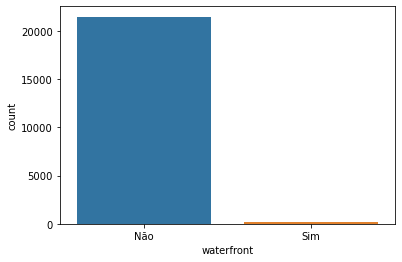

In [50]:
sns.countplot(df4['waterfront'])

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='Density'>

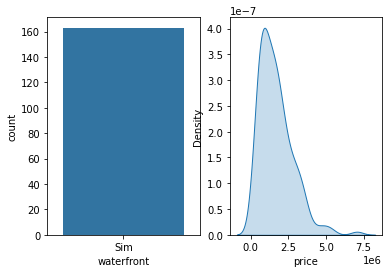

In [51]:
plt.subplot(1,2,1)
a= df4[df4['waterfront'] == 'Sim']
sns.countplot(a['waterfront'])

plt.subplot(1,2,2)
sns.kdeplot(df4[df4['waterfront'] == 'Sim']['price'], label='Sim' ,shade=True)

## view

In [52]:
df4['view'].drop_duplicates()

0      Não
282    Sim
Name: view, dtype: object

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='view', ylabel='count'>

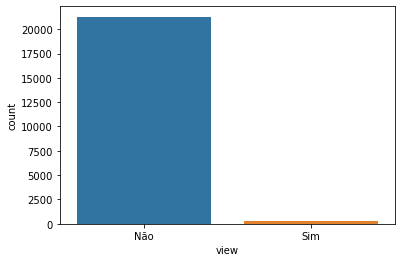

In [53]:
sns.countplot(df4['view'])

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='Density'>

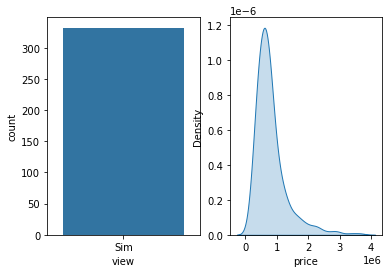

In [54]:
plt.subplot(1,2,1)
a= df4[df4['view'] == 'Sim']
sns.countplot(a['view'])

plt.subplot(1,2,2)
sns.kdeplot(df4[df4['view'] == 'Sim']['price'], label='Sim' ,shade=True)

## reform

In [55]:
df4['reform'].drop_duplicates()

0    Não
1    Sim
Name: reform, dtype: object

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reform', ylabel='count'>

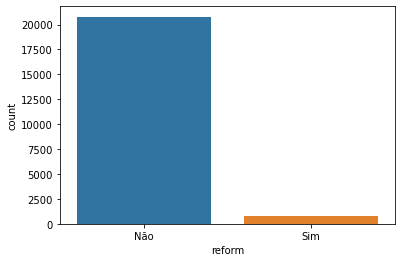

In [56]:
sns.countplot(df4['reform'])

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='Density'>

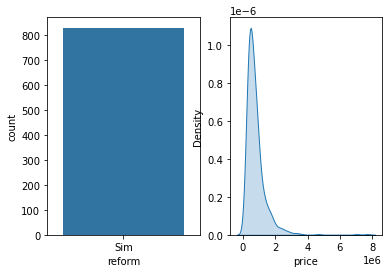

In [57]:
plt.subplot(1,2,1)
a= df4[df4['reform'] == 'Sim']
sns.countplot(a['reform'])

plt.subplot(1,2,2)
sns.kdeplot(df4[df4['reform'] == 'Sim']['price'], label='Sim' ,shade=True)

## semester

In [58]:
df4['semester'].drop_duplicates()

0      first
16    second
Name: semester, dtype: object

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='semester', ylabel='count'>

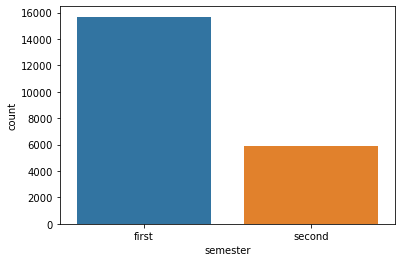

In [59]:
sns.countplot(df4['semester'])

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='Density'>

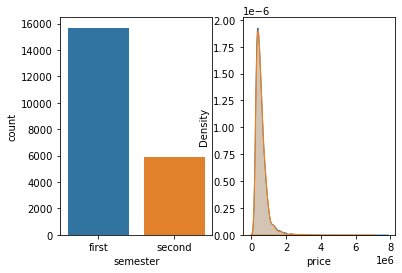

In [60]:
plt.subplot(1,2,1)
sns.countplot(df4['semester'])

plt.subplot(1,2,2)
sns.kdeplot(df4[df4['semester'] == 'first']['price'], label='first' ,shade=True)
sns.kdeplot(df4[df4['semester'] == 'second']['price'], label='second' ,shade=True)


## option_buy

In [61]:
df4['option_buy'].drop_duplicates()

0     no_buy
11       buy
Name: option_buy, dtype: object

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='option_buy', ylabel='count'>

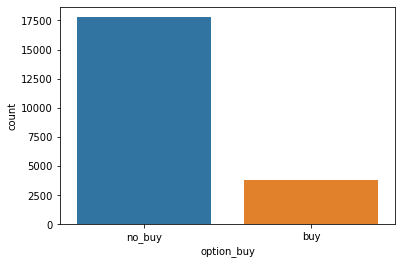

In [62]:
sns.countplot(df4['option_buy'])

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='Density'>

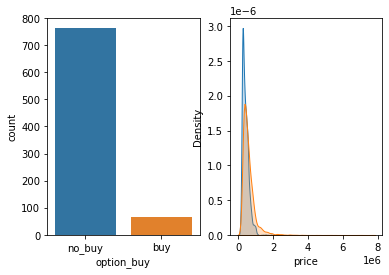

In [63]:
plt.subplot(1,2,1)
sns.countplot(a['option_buy'])

plt.subplot(1,2,2)
sns.kdeplot(df4[df4['option_buy'] == 'buy']['price'], label='buy' ,shade=True)
sns.kdeplot(df4[df4['option_buy'] == 'no_buy']['price'], label='no_buy' ,shade=True)

C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Utiliza

<AxesSubplot:xlabel='price', ylabel='Density'>

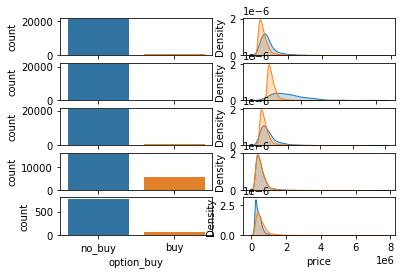

In [64]:
# Juntando os gráficos
plt.subplot(5,2,1)
sns.countplot(df4['view'])

plt.subplot(5,2,2)
sns.kdeplot(df4[df4['view'] == 'Sim']['price'], label='Sim' ,shade=True)
sns.kdeplot(df4[df4['view'] == 'Não']['price'], label='Não' ,shade=True);

plt.subplot(5,2,3)
sns.countplot(df4['waterfront'])

plt.subplot(5,2,4)
sns.kdeplot(df4[df4['waterfront'] == 'Sim']['price'], label='Sim' ,shade=True)
sns.kdeplot(df4[df4['waterfront'] == 'Não']['price'], label='Não' ,shade=True);

plt.subplot(5,2,5)
sns.countplot(df4['reform'])

plt.subplot(5,2,6)
sns.kdeplot(df4[df4['reform'] == 'Sim']['price'], label='Sim' ,shade=True)
sns.kdeplot(df4[df4['reform'] == 'Não']['price'], label='Não' ,shade=True);

plt.subplot(5,2,7)
sns.countplot(df4['semester'])

plt.subplot(5,2,8)
sns.kdeplot(df4[df4['semester'] == 'first']['price'], label='first' ,shade=True)
sns.kdeplot(df4[df4['semester'] == 'second']['price'], label='second' ,shade=True)

plt.subplot(5,2,9)
sns.countplot(a['option_buy'])

plt.subplot(5,2,10)
sns.kdeplot(df4[df4['option_buy'] == 'buy']['price'], label='buy' ,shade=True)
sns.kdeplot(df4[df4['option_buy'] == 'no_buy']['price'], label='no_buy' ,shade=True)

## 4.2 Análise Bivariada:

## Hipóteses:
    1. Imóveis com maior número de dormitórios deveriam custar mais;
    2. Imóveis com maior número de banheiros deveriam custar mais;
    3. Imóveis com maior números de sqft(pés quadrados) na sala de estar deveriam custar mais;
    4. Imóveis com maior número de sqft(pés quadrados) de porão deveriam custar mais;
    5. Imóveis com maior número de stft(pés quadrados) deveriam custar mais;
    6. Imóveis com maior número de pisos deveriam custar mais;
    7. Imóveis a beira mar deveriam custar mais
    8. Imóveis com vista deveriam custar mais;
    9. Imóveis renovados deveriam custar mais;
    10. Imóveis com melhores condições deveriam custar mais;
    11. Imóveis construídos a menos anos deveriam custar mais;
    12. Imovéis renovados a menos anos deveriam custar mais;
    13. Imóveis anunciados no segundo semestre deveriam custar menos;

## H1: Imóveis com maior número de dormitórios deveriam custar mais
    Falso: Imóveis com maior número de dormitórios custam menos

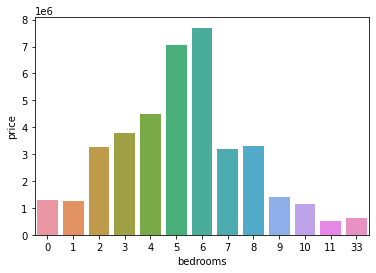

In [65]:
aux1 = df4[['bedrooms', 'price']].groupby('bedrooms').max().sort_values(by=['price']).reset_index()
sns.barplot(x='bedrooms', y='price', data=aux1);

In [66]:
aux1

,bedrooms,price
0,11,520000.00
1,33,640000.00
2,10,1148000.00
3,1,1247000.00
4,0,1295650.00
5,9,1400000.00
6,7,3200000.00
7,2,3278000.00
8,8,3300000.00
9,3,3800000.00


## H2: Imóveis com maior número de banheiros deveriam custar mais
    Verdadeiro: Imóveis com maior número de banheiros custam mais. Embora a soma dos valores dos imóveis com maior número de banheiros não representam o maior custo.

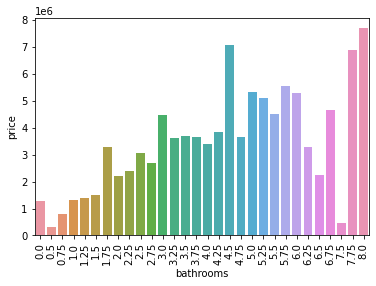

In [67]:
aux1 = df4[['bathrooms', 'price']].groupby('bathrooms').max().sort_values('price').reset_index()
sns.barplot(x='bathrooms', y='price', data=aux1);
plt.xticks(rotation=90);

In [68]:
aux1

,bathrooms,price
0,0.50,312500.00
1,7.50,450000.00
2,0.75,785000.00
3,0.00,1295650.00
4,1.00,1300000.00
5,1.25,1388000.00
6,1.50,1500000.00
7,2.00,2200000.00
8,6.50,2238890.00
9,2.25,2400000.00


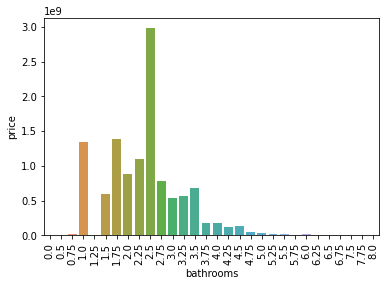

In [69]:
aux2 = df4[['bathrooms', 'price']].groupby('bathrooms').sum().sort_values('price').reset_index()
sns.barplot(x='bathrooms', y='price', data=aux2);
plt.xticks(rotation=90);

In [70]:
aux2

,bathrooms,price
0,7.50,450000.00
1,0.50,949500.00
2,6.50,3418890.00
3,0.00,4481600.00
4,6.75,5468000.00
5,1.25,5590950.00
6,6.25,6188000.00
7,7.75,6885000.00
8,5.75,9970000.00
9,8.00,9980000.00


## H3: Imóveis com maior números de sqft (pés quadrados) na sala de estar deveriam custar mais
    Verdadeiro: Imovés com maior número de sqft na sala de estar custam mais

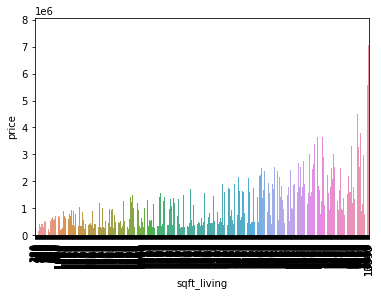

In [71]:
aux1 = df4[['sqft_living', 'price']].groupby('sqft_living').max().sort_values('price').reset_index()
sns.barplot(x='sqft_living', y='price', data=aux1);
plt.xticks(rotation=90);

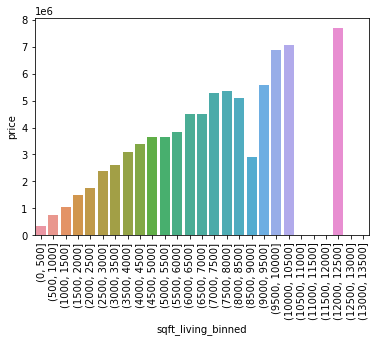

In [72]:
# Estratégia é criar grupos(bins) para melhorar a visualização
aux1 = df4[['sqft_living', 'price']].groupby('sqft_living').max().reset_index()

bins = list(np.arange(0, 13540, 500))
aux1['sqft_living_binned'] = pd.cut(aux1['sqft_living'], bins=bins)
aux2 = aux1[['sqft_living_binned', 'price']].groupby('sqft_living_binned').max().reset_index()

sns.barplot(x='sqft_living_binned', y='price', data=aux2);
plt.xticks(rotation=90);

## H4: Imóveis com maior número de sqft (pés quadrados) de porão deveriam custar mais
    Falso: Imóveis com maior número de sqft de porão custam menos

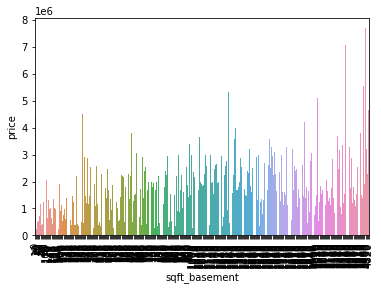

In [73]:
aux1 = df4[['sqft_basement', 'price']].groupby('sqft_basement').max().sort_values('price').reset_index()
sns.barplot(x='sqft_basement', y='price', data=aux1);
plt.xticks(rotation=90);

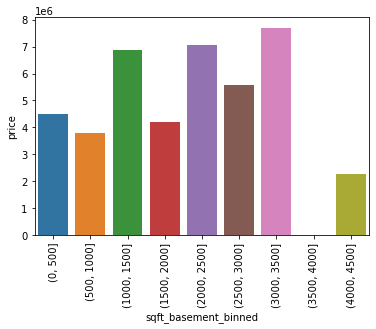

In [74]:
# Estratégia é criar grupos(bins) para melhorar a visualização
aux1 = df4[['sqft_basement', 'price']].groupby('sqft_basement').max().reset_index()

bins = list(np.arange(0, 4820, 500))
aux1['sqft_basement_binned'] = pd.cut(aux1['sqft_basement'], bins=bins)
aux2 = aux1[['sqft_basement_binned', 'price']].groupby('sqft_basement_binned').max().reset_index()

sns.barplot(x='sqft_basement_binned', y='price', data=aux2);
plt.xticks(rotation=90);

## H5: Imóveis com maior número de sqft (pés quadrados) deveriam custar mais
    Falso: Imóveis com maior número de sqft custam menos
    Insight

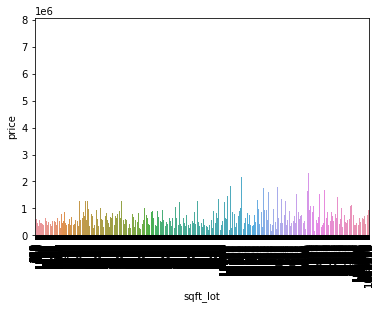

In [75]:
aux1 = df4[['sqft_lot', 'price']].groupby('sqft_lot').max().sort_values('price').reset_index()
sns.barplot(x='sqft_lot', y='price', data=aux1);
plt.xticks(rotation=90);

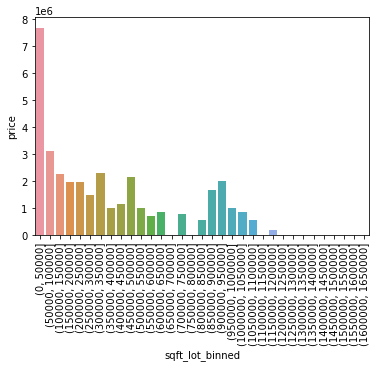

In [76]:
# Estratégia é criar grupos(bins) para melhorar a visualização
aux1 = df4[['sqft_lot', 'price']].groupby('sqft_lot').max().reset_index()

bins = list(np.arange(0, 1651359, 50000))
aux1['sqft_lot_binned'] = pd.cut(aux1['sqft_lot'], bins=bins)
aux2 = aux1[['sqft_lot_binned', 'price']].groupby('sqft_lot_binned').max().reset_index()

sns.barplot(x='sqft_lot_binned', y='price', data=aux2);
plt.xticks(rotation=90);

## H6: Imóveis com maior número de pisos deveriam custar mais
    Falso: Imóveis com maior número de pisos custam menos

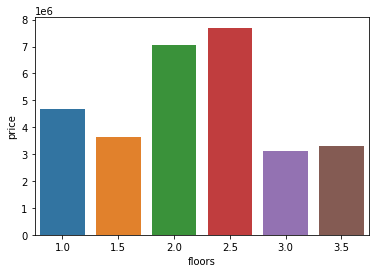

In [77]:
aux1 = df4[['floors', 'price']].groupby('floors').max().sort_values('price').reset_index()
sns.barplot(x='floors', y='price', data=aux1);

In [78]:
aux1

,floors,price
0,3.00,3100000.00
1,3.50,3300000.00
2,1.50,3650000.00
3,1.00,4668000.00
4,2.00,7062500.00
5,2.50,7700000.00


## H7: Imóveis a beira mar deveriam custar 
    Falso: Imóveis a beira mas custam menos
    Insight

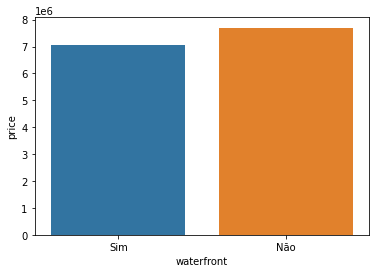

In [79]:
aux1 = df4[['waterfront', 'price']].groupby('waterfront').max().sort_values('price').reset_index()
sns.barplot(x='waterfront', y='price', data=aux1);

In [80]:
aux1

,waterfront,price
0,Sim,7062500.00
1,Não,7700000.00


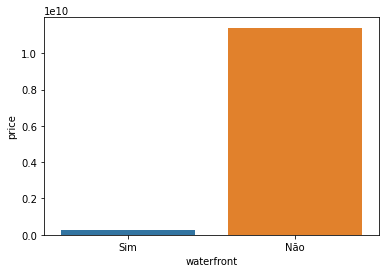

In [81]:
aux2 = df4[['waterfront', 'price']].groupby('waterfront').sum().sort_values('price').reset_index()
sns.barplot(x='waterfront', y='price', data=aux2);

## H8: Imóveis com vista deveriam custar mais
    Falso: Imóveis com vista custam menos
    Insight

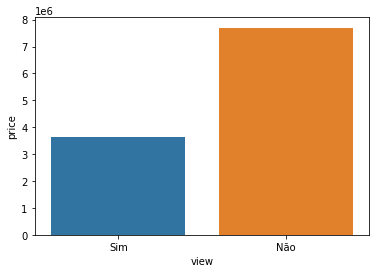

In [82]:
aux1 = df4[['view', 'price']].groupby('view').max().sort_values('price').reset_index()
sns.barplot(x='view', y='price', data=aux1);

In [83]:
aux1

,view,price
0,Sim,3650000.00
1,Não,7700000.00


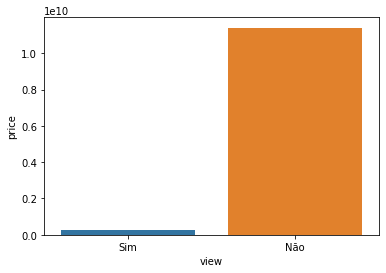

In [84]:
aux2 = df4[['view', 'price']].groupby('view').sum().sort_values('price').reset_index()
sns.barplot(x='view', y='price', data=aux2);

## H9: Imóveis renovados deveriam custar mais
    Verdadeiro: Imóveis renovados custam mais. Embora a soma dos preços dos imóveis renovados não represente o maior custo
    Insigth

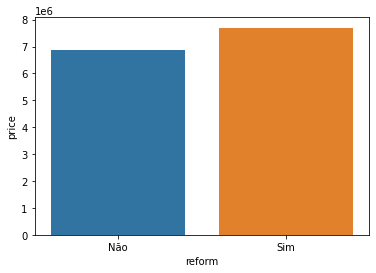

In [85]:
aux1 = df4[['reform', 'price']].groupby('reform').max().sort_values('price').reset_index()
sns.barplot(x='reform', y='price', data=aux1);

In [86]:
aux1

,reform,price
0,Não,6885000.00
1,Sim,7700000.00


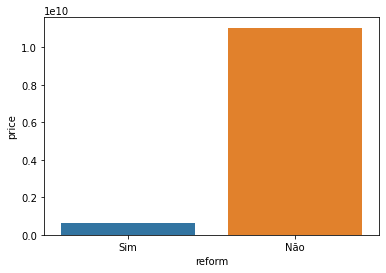

In [87]:
aux2 = df4[['reform', 'price']].groupby('reform').sum().sort_values('price').reset_index()
sns.barplot(x='reform', y='price', data=aux2);

In [88]:
aux2

,reform,price
0,Sim,638097553.00
1,Não,11034827455.00


## H10: Imóveis com melhores condições deveriam custar mais
    Falso: Imóveis em melhores condições custam menos. Aqui estou considerando a soma dos preços dos imóveis.
    Insight

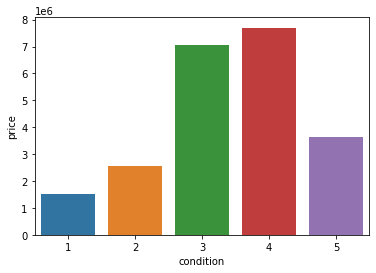

In [89]:
aux1 = df4[['condition', 'price']].groupby('condition').max().sort_values('price').reset_index()
sns.barplot(x='condition', y='price', data=aux1);

In [90]:
aux1

,condition,price
0,1,1500000.00
1,2,2555000.00
2,5,3650000.00
3,3,7062500.00
4,4,7700000.00


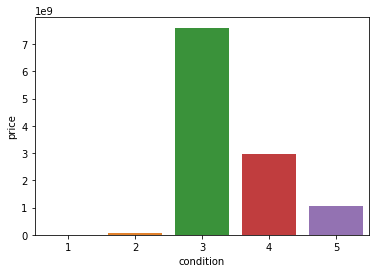

In [91]:
aux2 = df4[['condition', 'price']].groupby('condition').sum().sort_values('price').reset_index()
sns.barplot(x='condition', y='price', data=aux2);

## H11: Imovéis renovados a menos anos deveriam custar mais
    Falso: Imóveis renovados a menos anos custam menos
    Insigth

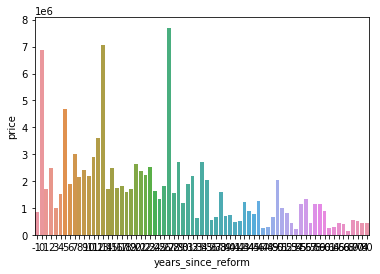

In [92]:
aux1 = df4[['years_since_reform', 'price']].groupby('years_since_reform').max().sort_values('price').reset_index()
sns.barplot(x='years_since_reform', y='price', data=aux1);

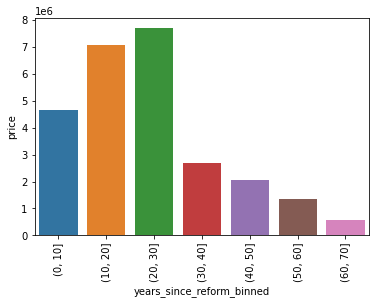

In [93]:
bins = list(np.arange(0, 80, 10))
aux1['years_since_reform_binned'] = pd.cut(aux1['years_since_reform'], bins=bins)
aux2 = aux1[['years_since_reform_binned', 'price']].groupby('years_since_reform_binned').max().reset_index()

sns.barplot(x='years_since_reform_binned', y='price', data=aux2);
plt.xticks(rotation=90);

## H12: Imóveis construídos a menos anos deveriam custar mais
    Verdadeiro: Imóveis construídos a menos anos custam mais

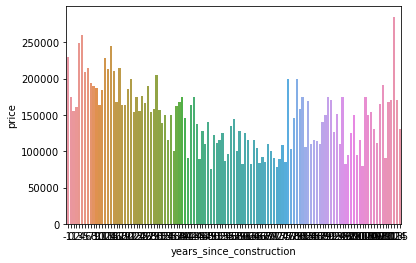

In [94]:
aux1 = df4[['years_since_construction', 'price']].groupby('years_since_construction').min().sort_values('price').reset_index()
sns.barplot(x='years_since_construction', y='price', data=aux1);

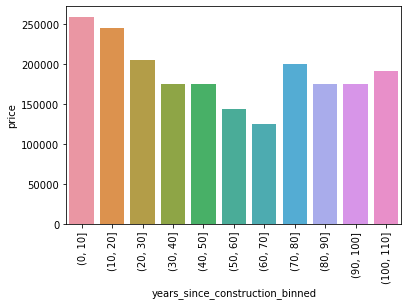

In [95]:
bins = list(np.arange(0, 115, 10))
aux1['years_since_construction_binned'] = pd.cut(aux1['years_since_construction'], bins=bins)
aux2 = aux1[['years_since_construction_binned', 'price']].groupby('years_since_construction_binned').max().reset_index()

sns.barplot(x='years_since_construction_binned', y='price', data=aux2);
plt.xticks(rotation=90);

## H13: Imóveis anunciados no segundo semestre deveriam custar menos
    Verdadeiro: Imóveis anunciados no segundo semestre custam menos

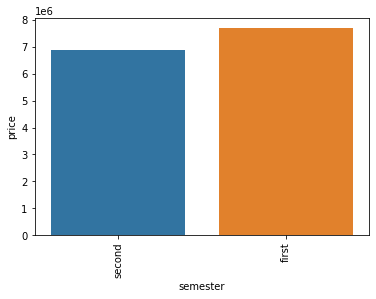

In [96]:
aux1 = df4[['semester', 'price']].groupby('semester').max().sort_values('price').reset_index()
sns.barplot(x='semester', y='price', data=aux1);
plt.xticks(rotation=90);

## 4.2.1  Resumo das Hipoteses

In [97]:
tab = [['Hipoteses', 'Conclusao', 'Relevância'],
       ['H1', 'Falsa', '-'],
       ['H2', 'Verdadeira', '-'],
       ['H3', 'Verdadeira', '-'],
       ['H4', 'Falsa', '-'],
       ['H5', 'Falsa', 'Insight'],
       ['H6', 'Falsa', '-'],
       ['H7', 'Falsa', 'Insight'],
       ['H8', 'Falsa', 'Insight'],
       ['H9', 'Verdadeira', 'Insight'],
       ['H10', 'Falso', 'Insight'],
       ['H11', 'Falso', 'Insight'],
       ['H12', 'Verdadeira', '-'],
       ['H13', 'Verdadeiro', '-'],
       ]
print(tabulate(tab, headers='firstrow'))

Hipoteses    Conclusao    Relevância
-----------  -----------  ------------
H1           Falsa        -
H2           Verdadeira   -
H3           Verdadeira   -
H4           Falsa        -
H5           Falsa        Insight
H6           Falsa        -
H7           Falsa        Insight
H8           Falsa        Insight
H9           Verdadeira   Insight
H10          Falso        Insight
H11          Falso        Insight
H12          Verdadeira   -
H13          Verdadeiro   -


## 4.3 Análise Multivariada

### 4.3.1 Numerical Attributes

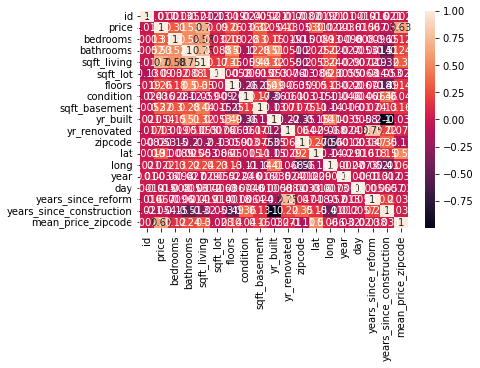

In [98]:
correlation = num_attributes.corr(method='pearson')
sns.heatmap(correlation, annot=True);

### 4.3.2 Categorical  Attributes

In [99]:
def cramer_v(x,y):
    cm = pd.crosstab(x,y).values
    n= cm.sum()
    r, k= cm.shape
    
    chi2 = ss.chi2_contingency(cm)[0]
    chi2corr = max(0, chi2 - (k-1)*(r-1)/(n-1))
    
    kcorr = k -(k-1)**2/(n-1)
    rcorr = r -(r-1)**2/(n-1)
    
    return np.sqrt((chi2corr/n) / ( min( kcorr-1, rcorr-1) ) )

In [100]:
# only categorical data
a = df4.select_dtypes(include='object')
a.head()

,waterfront,view,month,reform,semester,option_buy
0,Não,Não,10,Não,first,no_buy
1,Não,Não,12,Sim,first,no_buy
2,Não,Não,2,Não,first,no_buy
3,Não,Não,12,Não,first,no_buy
4,Não,Não,2,Não,first,no_buy


In [101]:
# Calculate cramer v
a1 = cramer_v(a['waterfront'], a['waterfront'])
a2 = cramer_v(a['waterfront'], a['view'])
a3 = cramer_v(a['waterfront'], a['reform'])
a4 = cramer_v(a['waterfront'], a['semester'])
a5 = cramer_v(a['waterfront'], a['option_buy'])

a6 = cramer_v(a['view'], a['waterfront'])
a7 = cramer_v(a['view'], a['view'])
a8 = cramer_v(a['view'], a['reform'])
a9 = cramer_v(a['view'], a['semester'])
a10 = cramer_v(a['view'], a['option_buy'])

a11 = cramer_v(a['reform'], a['waterfront'])
a12 = cramer_v(a['reform'], a['view'])
a13 = cramer_v(a['reform'], a['reform'])
a14 = cramer_v(a['reform'], a['semester'])
a15 = cramer_v(a['reform'], a['option_buy'])

a16 = cramer_v(a['semester'], a['waterfront'])
a17 = cramer_v(a['semester'], a['view'])
a18 = cramer_v(a['semester'], a['reform'])
a19 = cramer_v(a['semester'], a['semester'])
a20 = cramer_v(a['semester'], a['option_buy'])

a21 = cramer_v(a['option_buy'], a['waterfront'])
a22 = cramer_v(a['option_buy'], a['view'])
a23 = cramer_v(a['option_buy'], a['reform'])
a24 = cramer_v(a['option_buy'], a['semester'])
a25 = cramer_v(a['option_buy'], a['option_buy'])

# Final dataset
d = pd.DataFrame({'waterfront': [a1,a2,a3,a4,a5],
                  'view'      : [a6,a7,a8,a9,a10],
                  'reform'    : [a11,a12,a13,a14,a15],
                  'semester'  : [a16,a17,a18,a19,a20],
                  'option_buy': [a21,a22,a23,a24,a25]
                 })

d = d.set_index(d.columns)
d

,waterfront,view,reform,semester,option_buy
waterfront,1.00,0.00,0.10,0.00,0.03
view,0.00,1.00,0.04,0.00,0.02
reform,0.10,0.04,1.00,0.00,0.05
semester,0.00,0.00,0.00,1.00,0.02
option_buy,0.03,0.02,0.05,0.02,1.00


<AxesSubplot:>

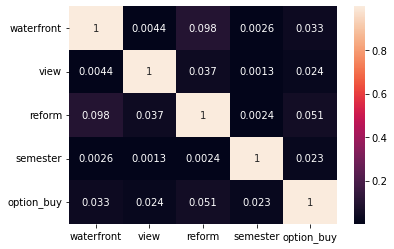

In [102]:
sns.heatmap(d, annot=True)

## Saving purchase instructions

In [104]:
cols_drop= ['month','day', 'semester' ]
tb_classification = df3.drop(cols_drop, axis=1)

In [106]:
tb_classification = tb_classification[tb_classification['option_buy']=='buy'].copy().reset_index()

In [108]:
tb_classification.to_csv('comprar.csv')